In [164]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Đọc dữ liệu

In [165]:
btc_data = pd.read_csv('BTC-USD.csv')
eth_data = pd.read_csv('ETH-USD.csv')

Dữ liệu BTC-USD

In [166]:
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2019,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
1,1/2/2019,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5.244857e+09
2,1/3/2019,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4.530215e+09
3,1/4/2019,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4.847965e+09
4,1/5/2019,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5.137610e+09


Dữ liệu ETH-USD

In [167]:
eth_data.head()

,Date,Close-ETH
0,1/1/2019,140.819412
1,1/2/2019,155.047684
2,1/3/2019,149.135010
3,1/4/2019,154.581940
4,1/5/2019,155.638596


Kết hợp dữ liệu BTC và ETH

In [168]:
data = pd.merge(btc_data, eth_data, on='Date')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close-ETH
0,1/1/2019,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09,140.819412
1,1/2/2019,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5.244857e+09,155.047684
2,1/3/2019,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4.530215e+09,149.135010
3,1/4/2019,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4.847965e+09,154.581940
4,1/5/2019,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5.137610e+09,155.638596


In [169]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**<h3>Dự đoán</h3>**

In [170]:

# data = data.reset_index(drop=True) # Reset the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close', 'Close-ETH']]
data = data.dropna() # Drop missing values

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]
print(len(train_data))
print(len(test_data))
print(len(val_data))

1085
310
156


In [152]:
from pmdarima.arima import auto_arima
train_exog = train_data[["Close-ETH"]]
model = auto_arima(train_data.Close, 
                      test='adf',       # use adftest to find      
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True,  
                      stepwise=True,
                      exogenous= train_exog)
print(model.summary())
# # 3. Quá trình Training
# x_train = np.array(train_data.index).reshape(-1, 1)
# print(x_train)
# y_train = np.array(train_data['Close'])
# print(y_train)

# # Find the best ARIMA model using auto_arima
# from pmdarima.arima import auto_arima
# model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# # Fit the model
# model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18326.915, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18334.592, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18334.396, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18334.415, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18333.913, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18338.414, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18338.402, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18328.615, Time=3.88 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18328.727, Time=2.67 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18336.402, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18339.506, Time=0.68 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18339.964, Time=0.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.15 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=18338.278, Time=0.47 sec

Best model:  ARIMA(2,1,2

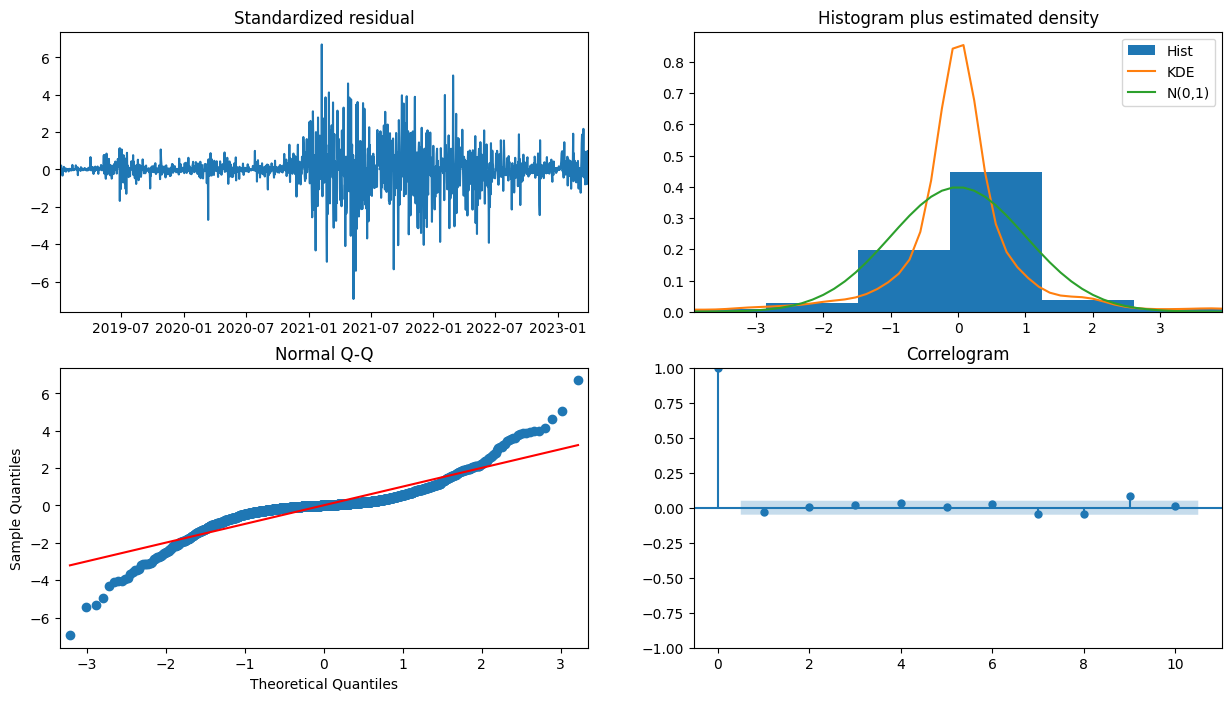

In [150]:
model.plot_diagnostics(figsize=(15,8))
plt.show()

In [160]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data.Close, 
 exog=train_exog,
 order=(2,1,2),
 enforce_invertibility=False, enforce_stationarity=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [183]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
test_exog = test_data[['Close-ETH']]
model_fit = model.fit()
# y_pred = model.predict(n_periods=len(y_test))
y_pred = model_fit.forecast(steps=len(y_test), exog=test_exog)
print(y_pred)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
val_exog = val_data[['Close-ETH']]
print(val_exog)
y_pred_val =  model_fit.forecast(steps=len(y_val), exog=val_exog)
print(y_pred_val)

              Close-ETH
Date                   
2022-10-27  1514.374878
2022-10-28  1555.477905
2022-10-29  1619.698486
2022-10-30  1590.783325
2022-10-31  1572.714478
...                 ...
2023-03-27  1715.460815
2023-03-28  1772.785645
2023-03-29  1793.001831
2023-03-30  1792.737183
2023-03-31  1822.022095

[156 rows x 1 columns]


In [185]:
import datetime
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
print(last_index)
# last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
next_30_days_index = pd.date_range(start=last_index + datetime.timedelta(days=1), periods=30, freq='D')
print(next_30_days_index)
# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
x_next_30_days = np.array(next_30_days_index).reshape(-1, 1)

prev_30_days_exog = data[len(data)-30:]
prev_30_days_exog = prev_30_days_exog['Close-ETH']




# Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days)) 
y_next_30_days = model_fit.forecast(steps=len(x_next_30_days), exog = prev_30_days_exog) 

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

2023-03-31 00:00:00
DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', freq='D')
Predicted closing prices for the next 30 days:
2021-12-21    24743.129452
2021-12-22    23955.822506
2021-12-23    23905.076142
2021-12-24    23855.018440
2021-12-25    23859.378815
2021-12-26    23784.817027
2021-12-27    23495.902411
2021-12-28    22555.551741
2021-12-29    22447.395599
2021-12-30    22949.334901
2021-12-31    23976.701202
2022-01-01    24834.597175
2022-01-02    25047.

Validation RMSE: 2718.3732082727574
Testing RMSE: 3301.4239667420948
Validation MAPE: 0.13002763926155353
Testing MAPE: 0.09414962146557201


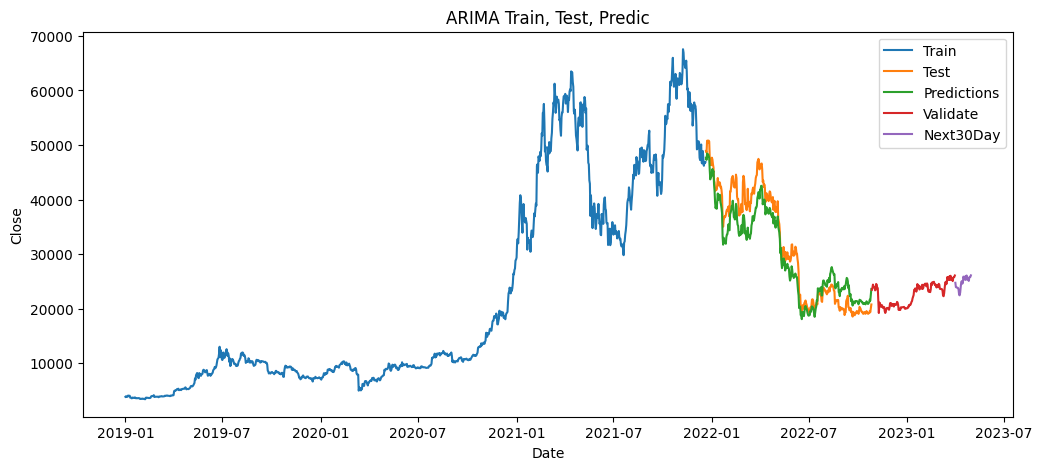

In [188]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = np.mean(np.abs(y_pred_val - y_val)/np.abs(y_val))  # MAPE
test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))  # MAPE
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)



# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predic')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
# plt.plot(last_data,y_next_30_days)
plt.plot(next_30_days_index,y_next_30_days)

plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()